In [13]:
def getDatatype(rawDatatype: str) -> str:
    if rawDatatype.startswith('string'):
        return rawDatatype.split('_')[0].capitalize() + ' of length ' + rawDatatype.split('_')[-1]
    return rawDatatype.capitalize()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir('Logs') if isfile(join('Logs', f))]
avlTreeResults = {getDatatype(f[8:-4]) : pd.read_csv('Logs/' + f) for f in onlyfiles if f[0] == 'A'}
skipListResults = {getDatatype(f[9:-4]) : pd.read_csv('Logs/' + f) for f in onlyfiles if f[0] == 'S'}

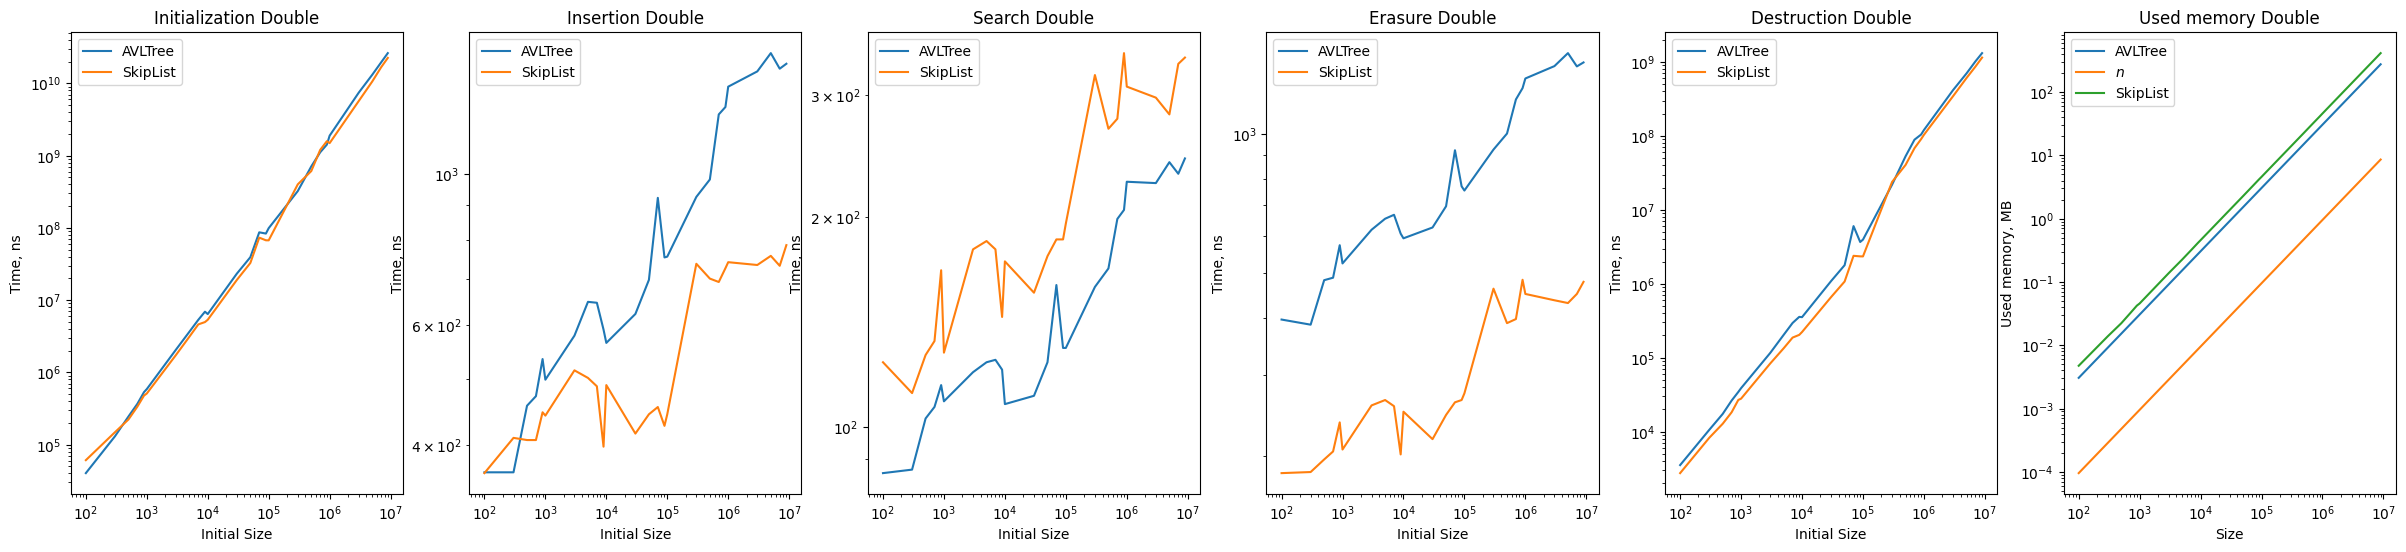

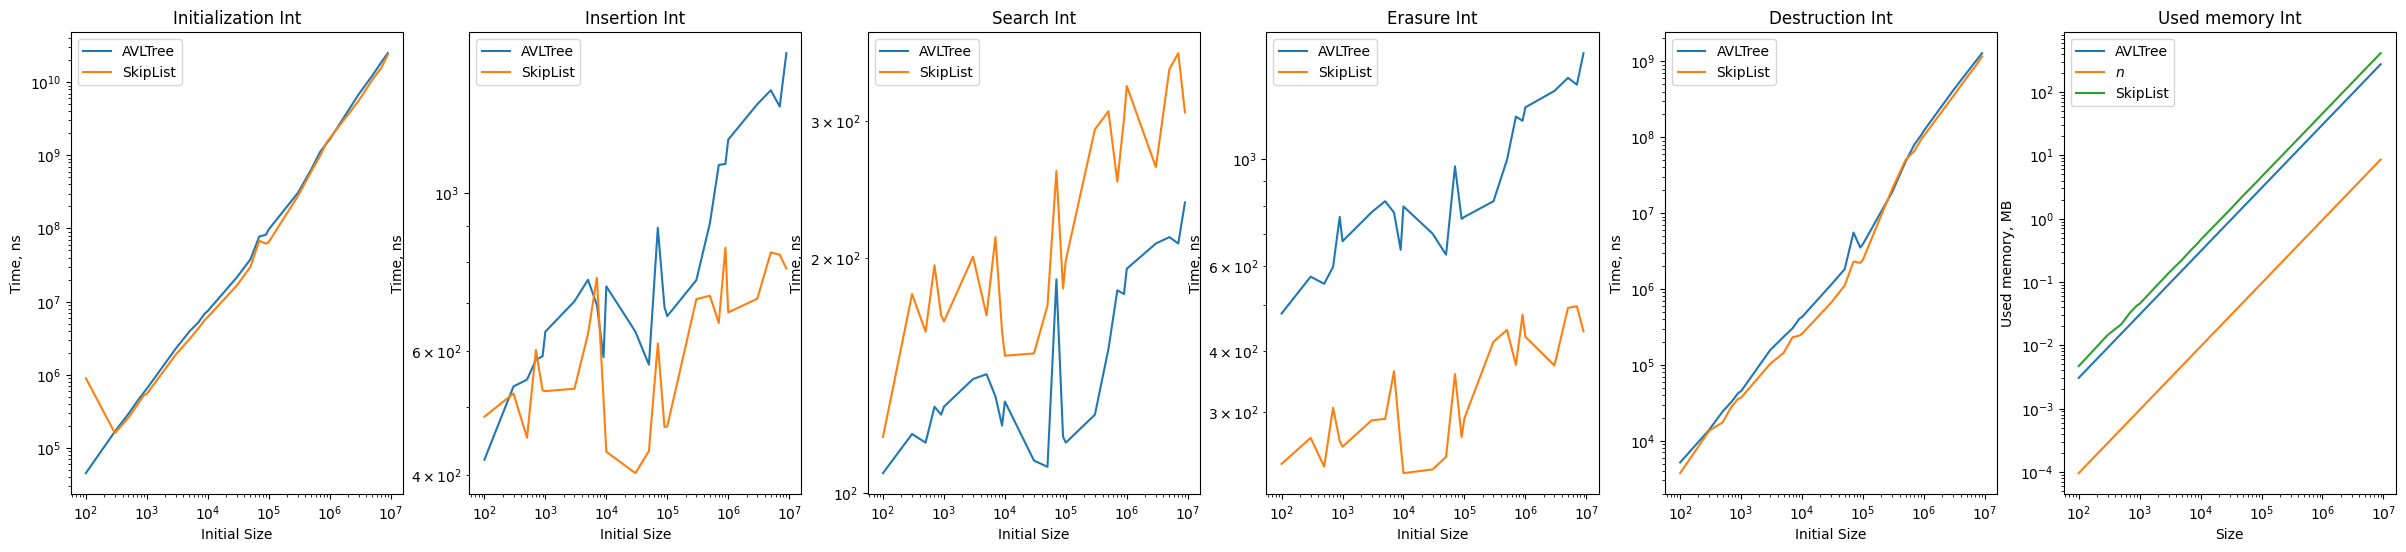

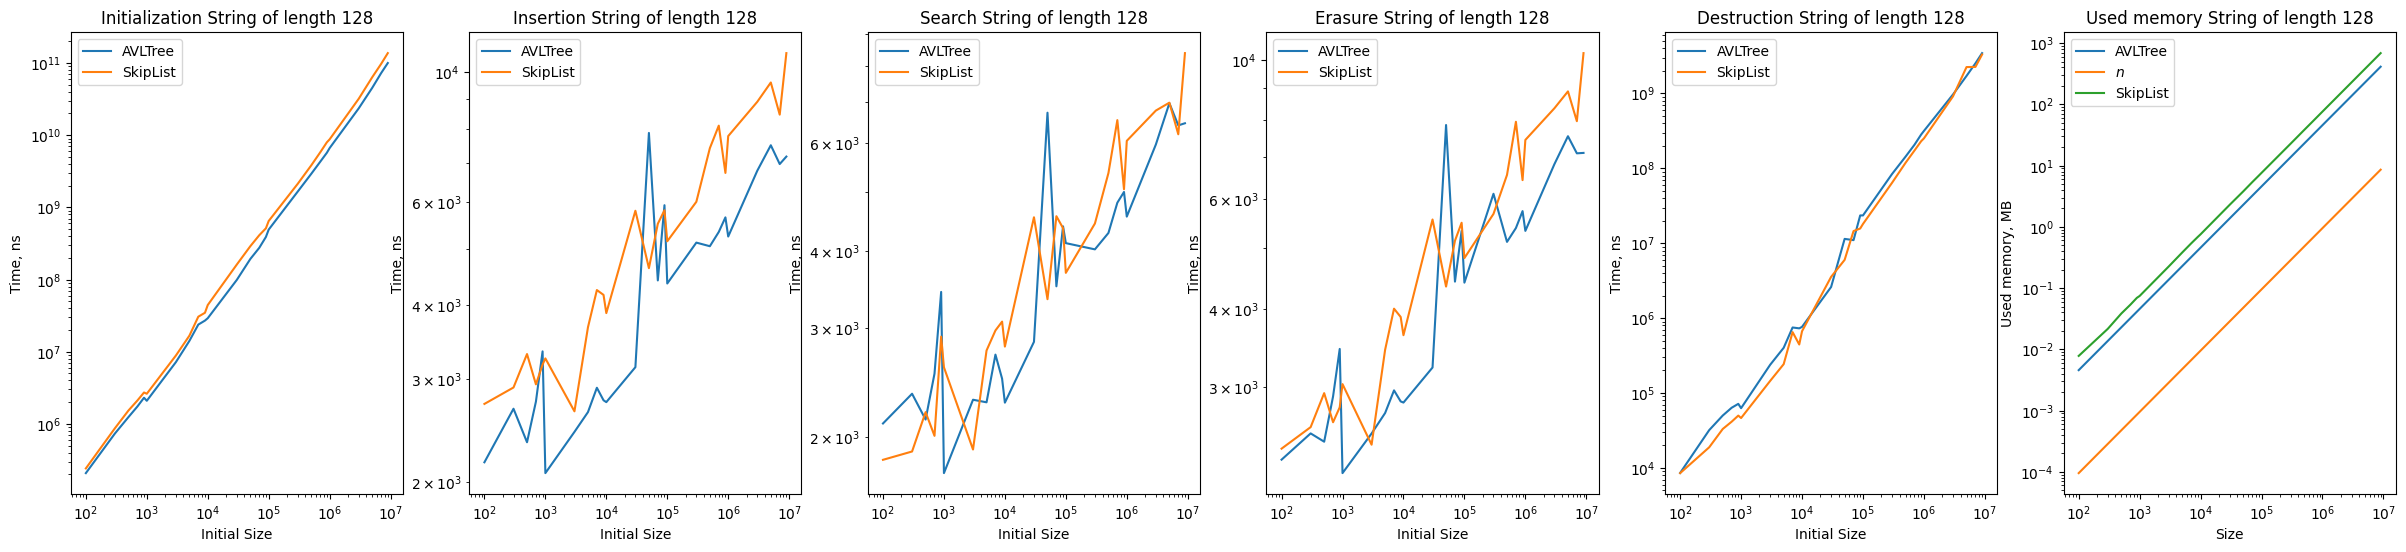

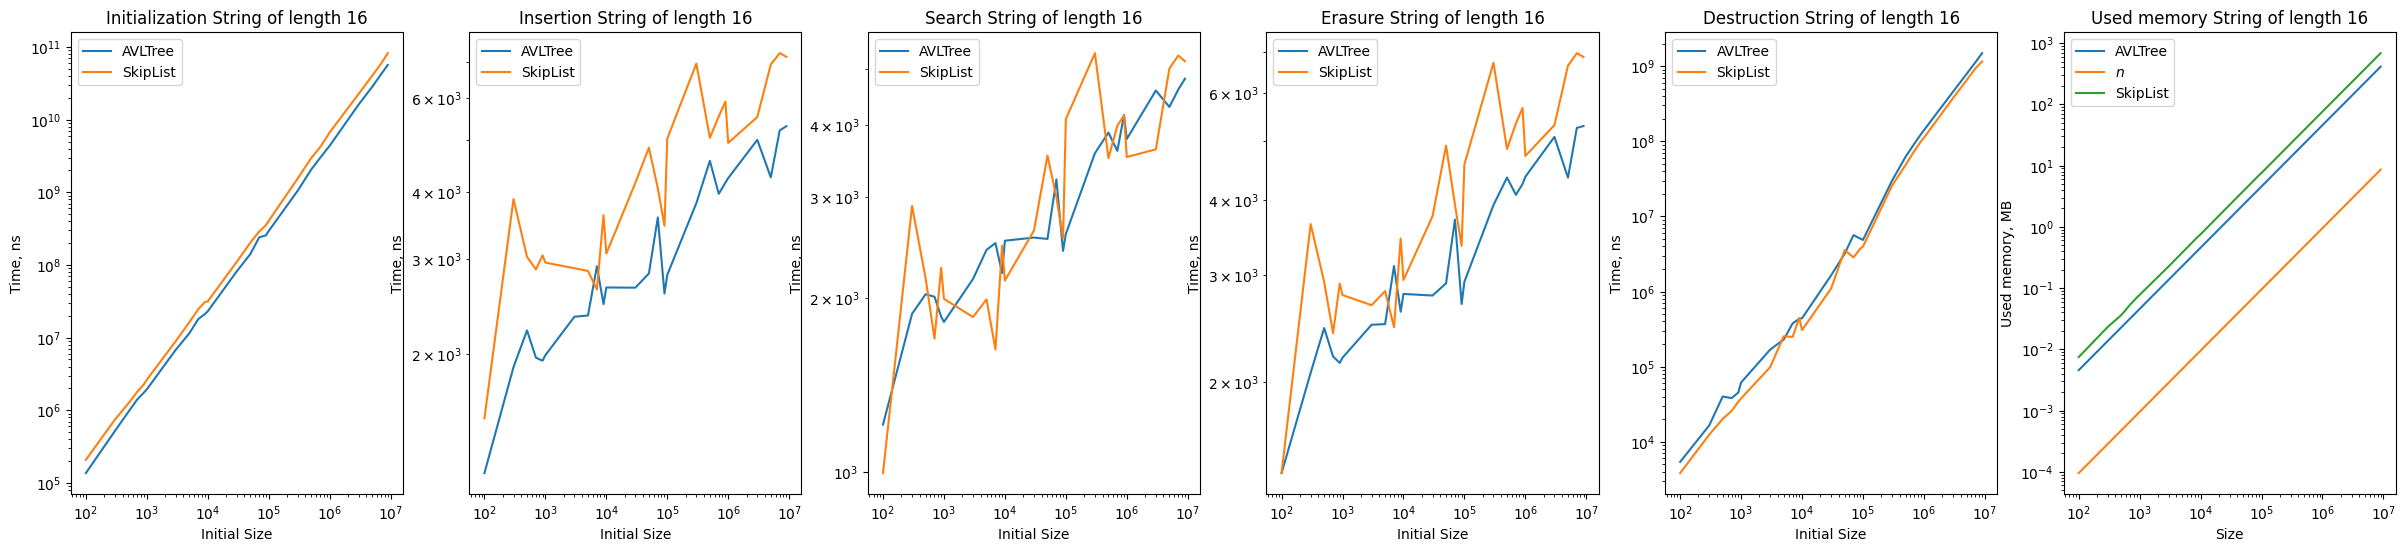

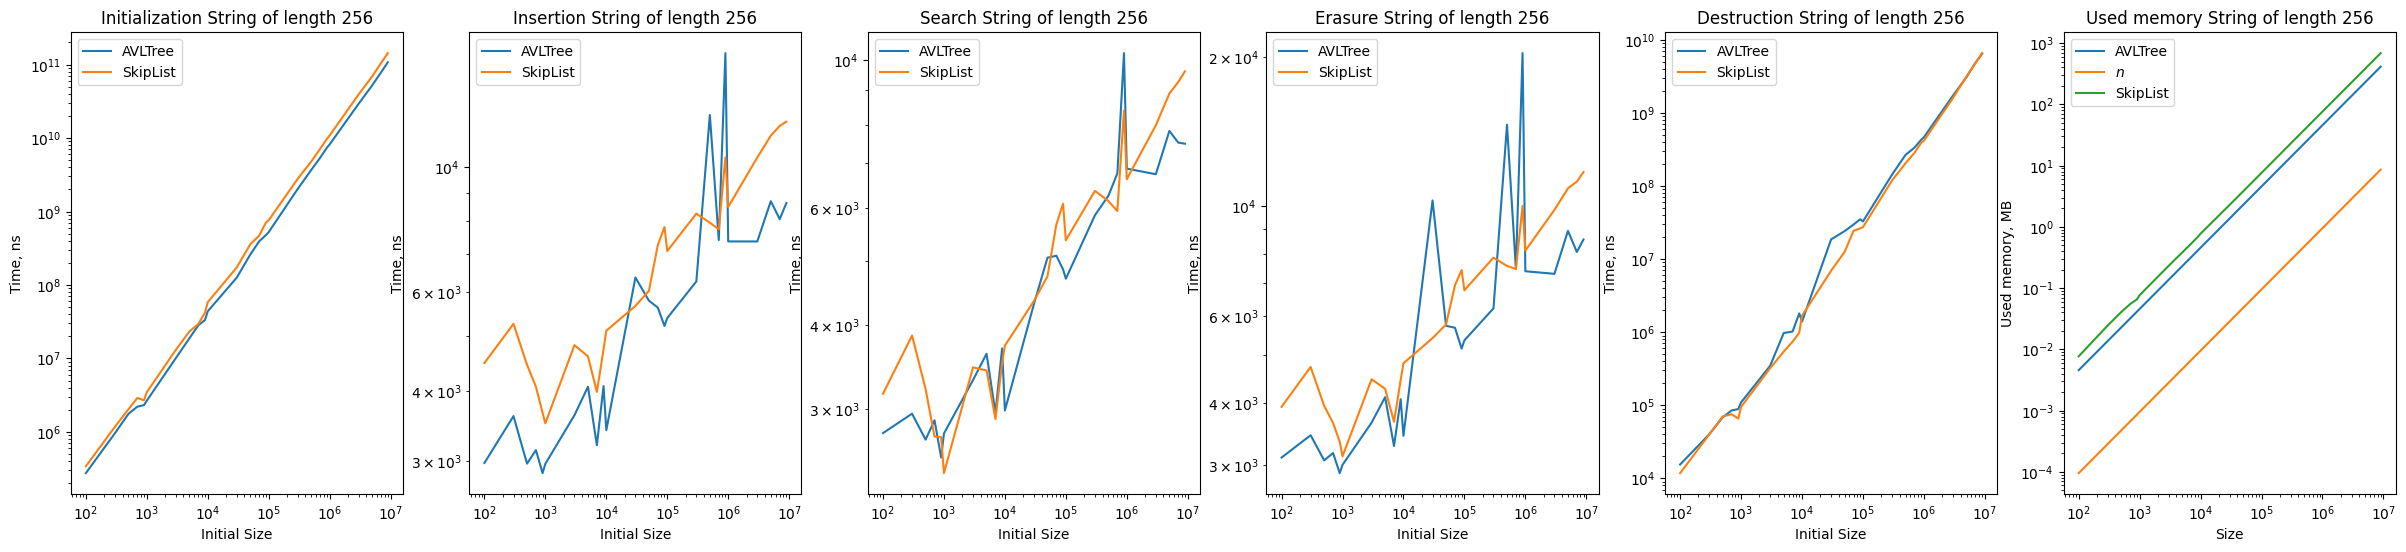

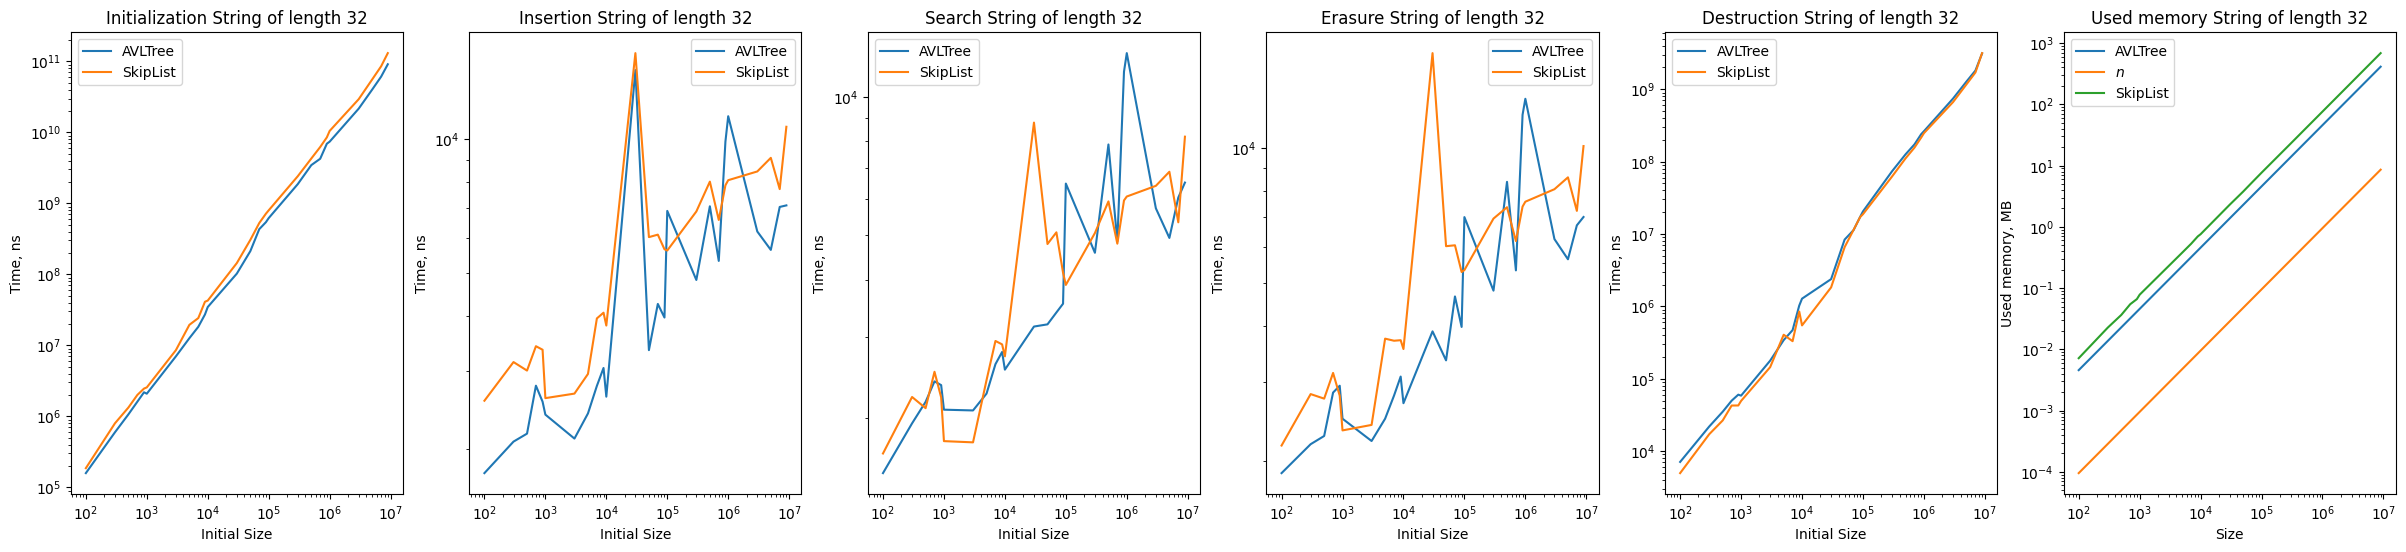

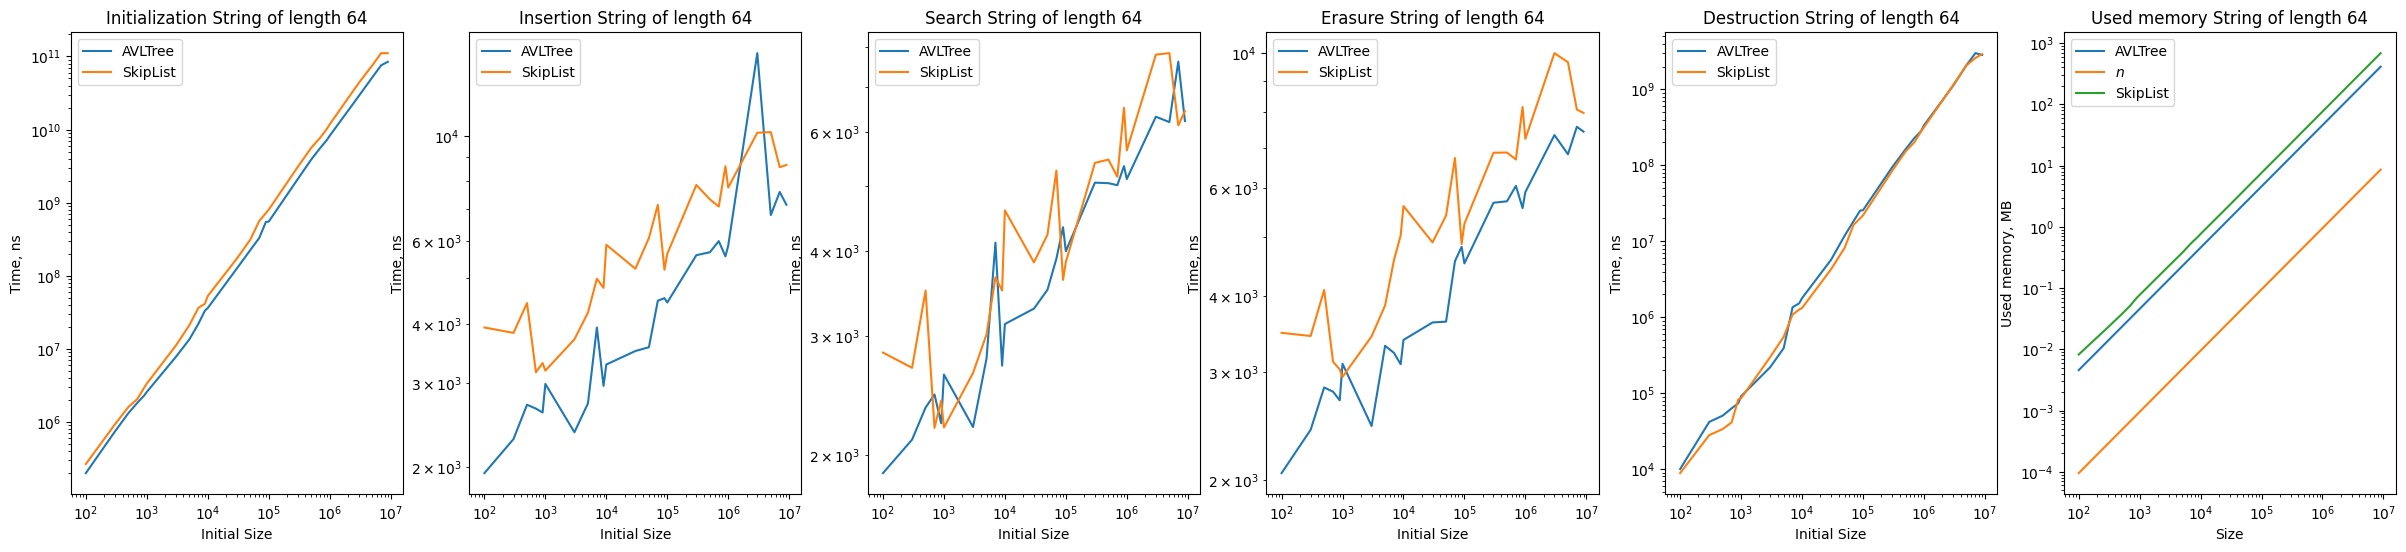

In [41]:
for datatype in sorted(avlTreeResults.keys()):
    fig, ax = plt.subplots(1, 6, figsize=(30, 6))

    for ds, dsResults in {'AVLTree' : avlTreeResults, 'SkipList' : skipListResults}.items():
        for i, operation in enumerate(('Initialization', 'Insertion', 'Search', 'Erasure', 'Destruction')):
            ax[i].set_xlabel('Initial Size')
            ax[i].set_ylabel('Time, ns')
            ax[i].set_title(operation + ' ' + datatype)

            ax[i].loglog(dsResults[datatype]['InitSize'], dsResults[datatype][operation + 'TimeNs'], label=ds)
            ax[i].legend()

        ax[5].set_xlabel('Size')
        ax[5].set_ylabel('Used memory, MB')
        ax[5].set_title('Used memory' + ' ' + datatype)

        ax[5].loglog(dsResults[datatype]['InitSize'], dsResults[datatype]['MemoryUsed'].astype(int) / (1024 ** 2), label=ds)
        if ds == 'AVLTree':
            ax[5].loglog(dsResults[datatype]['InitSize'], dsResults[datatype]['InitSize'].astype(int) / (1024 ** 2), label='$n$')
        ax[5].legend()

plt.show()

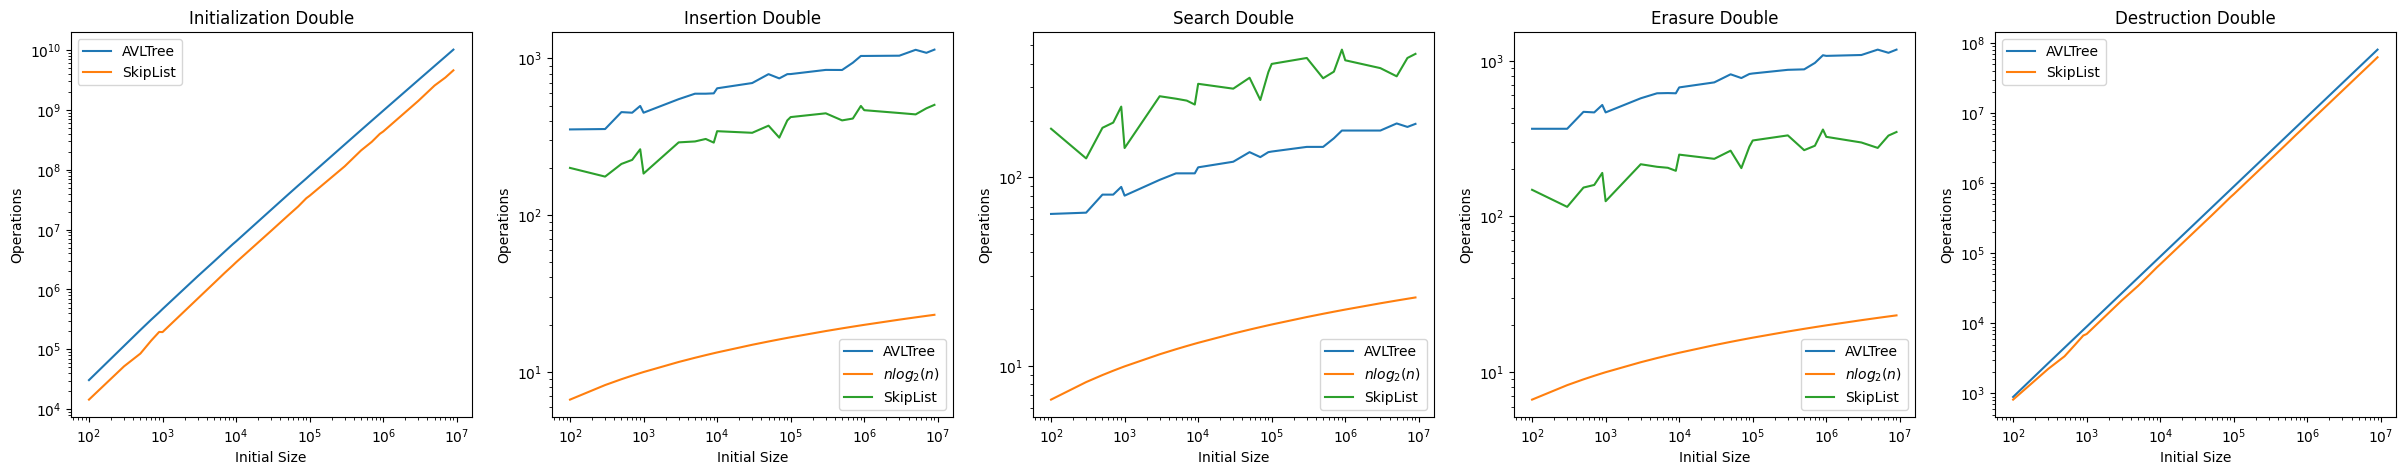

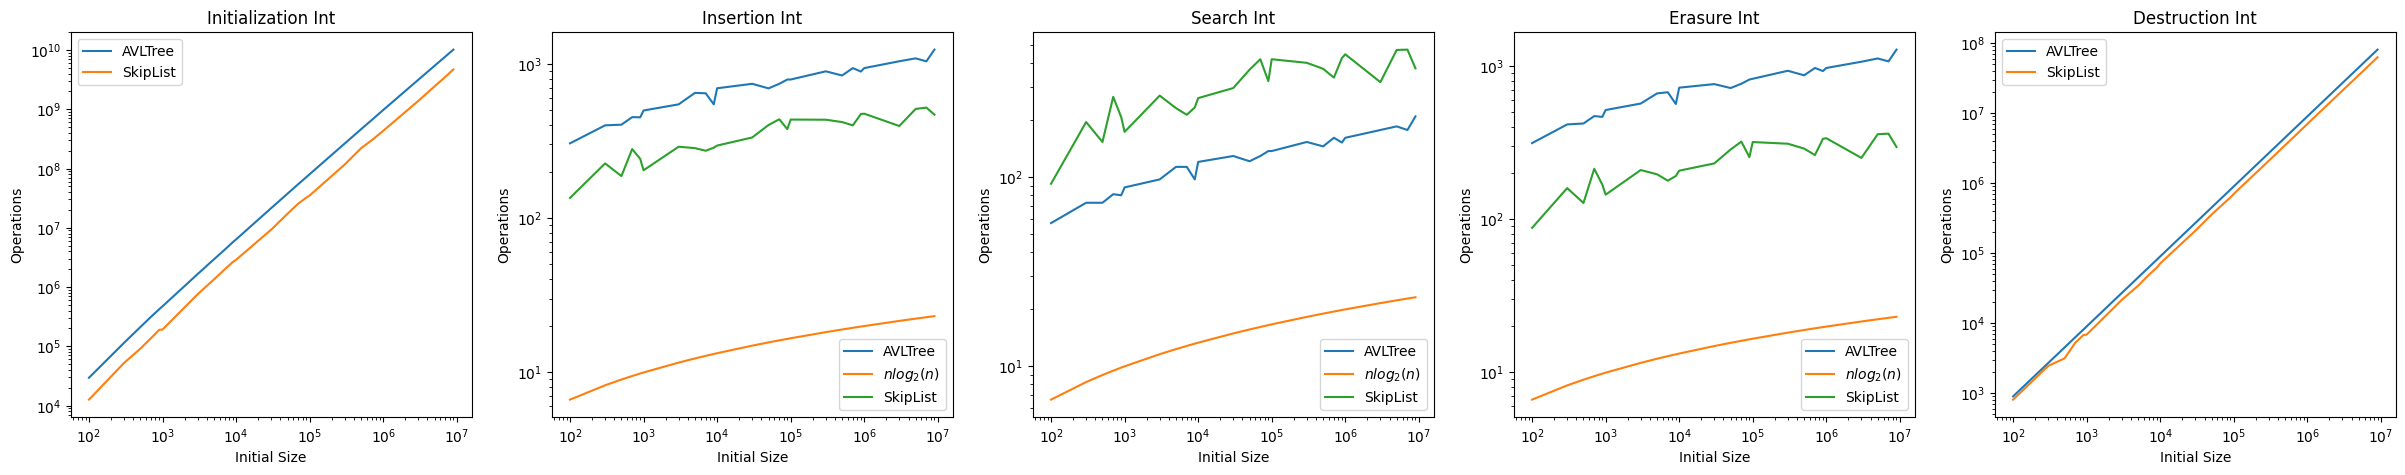

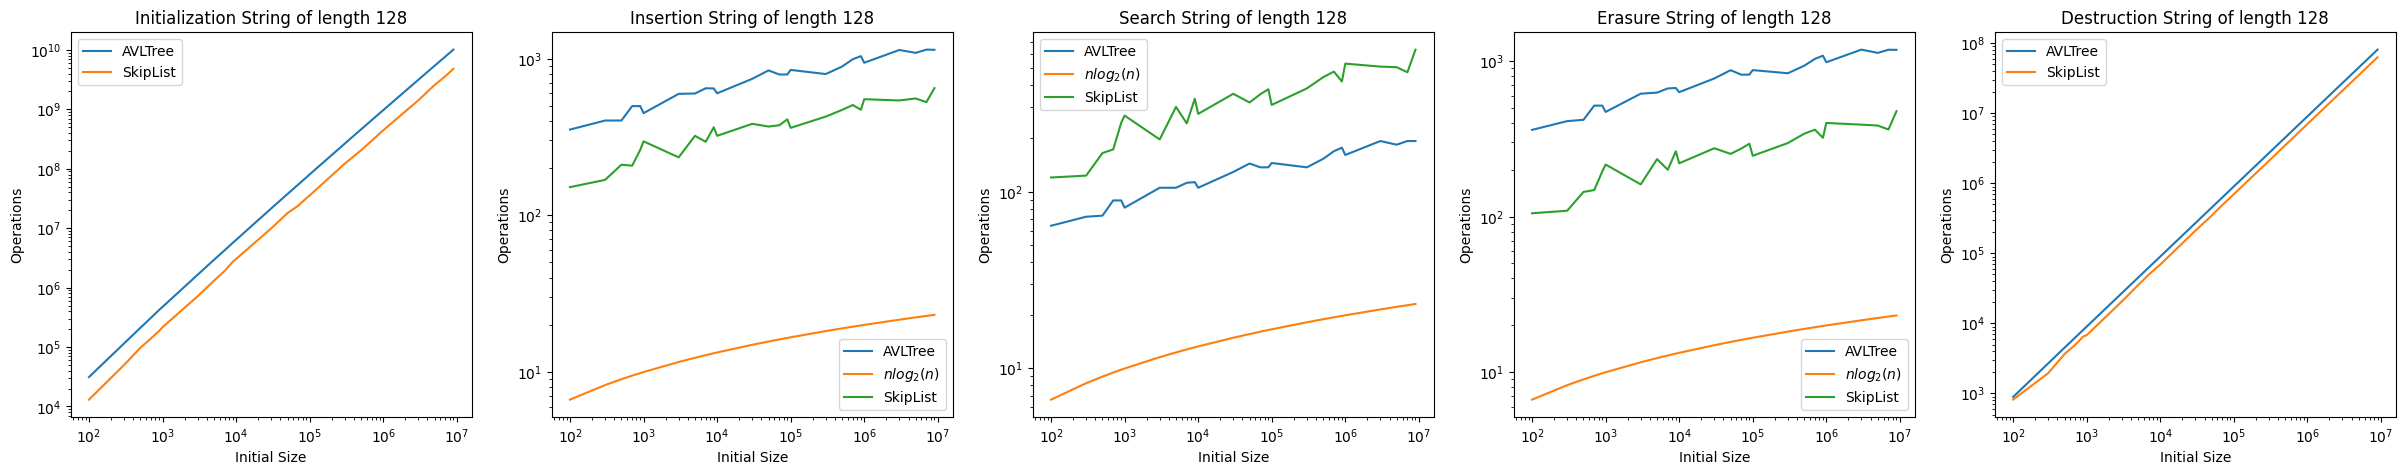

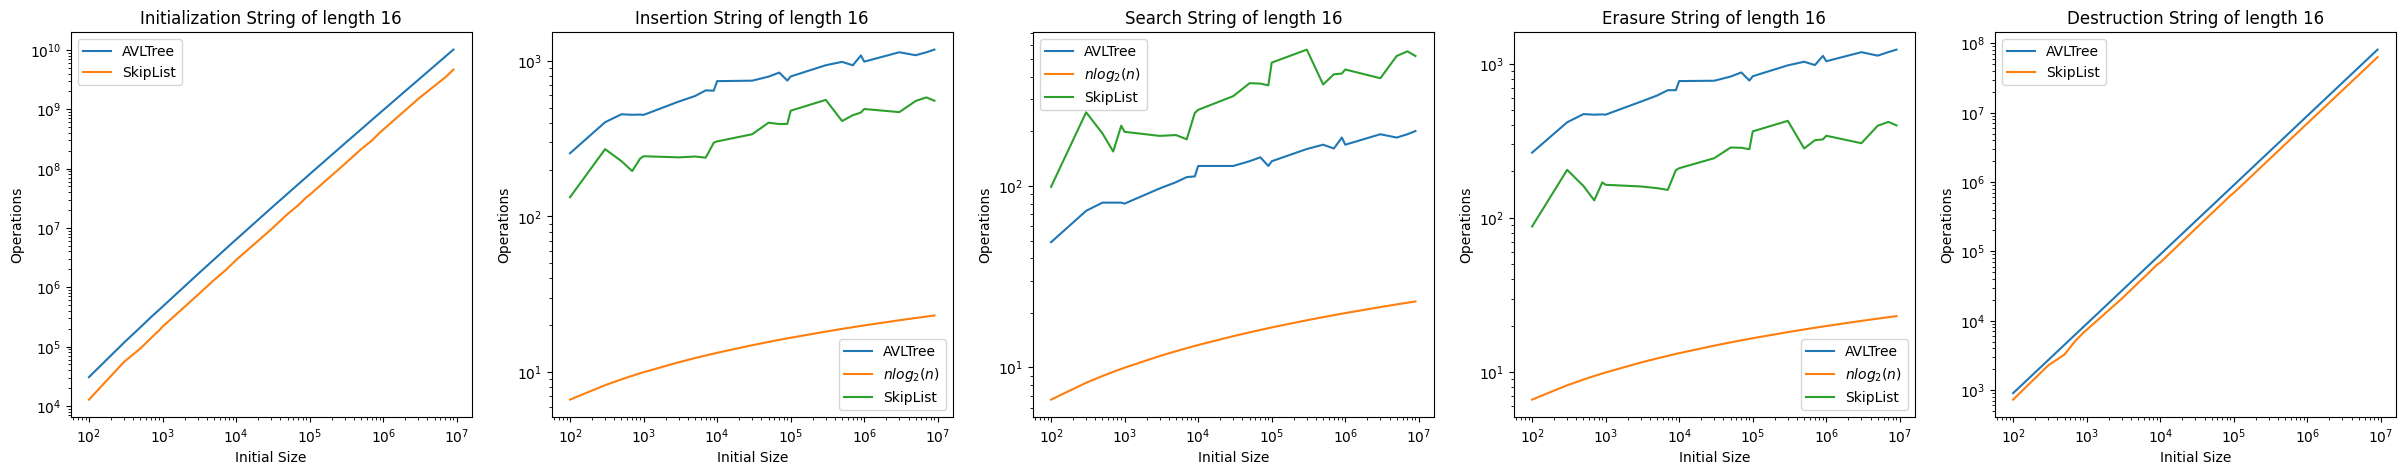

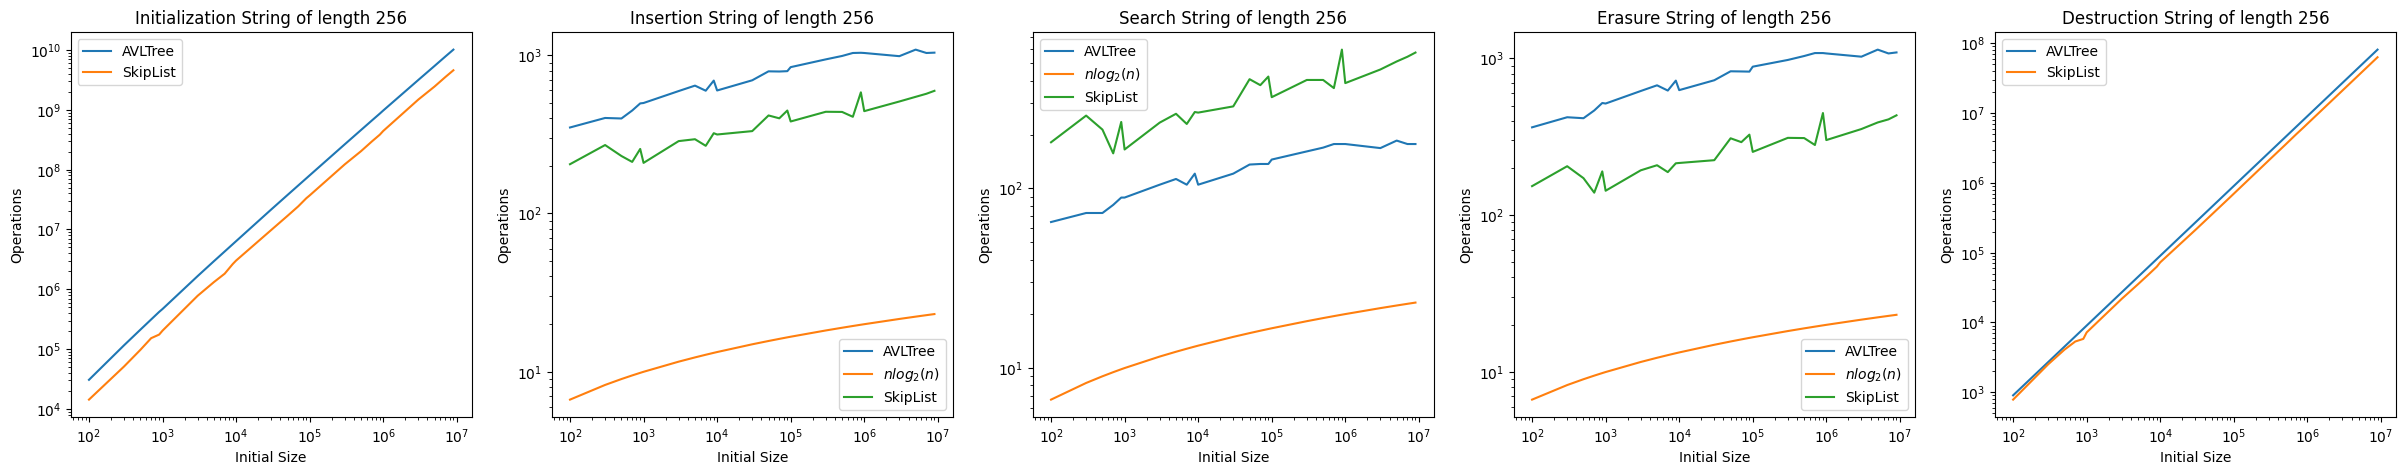

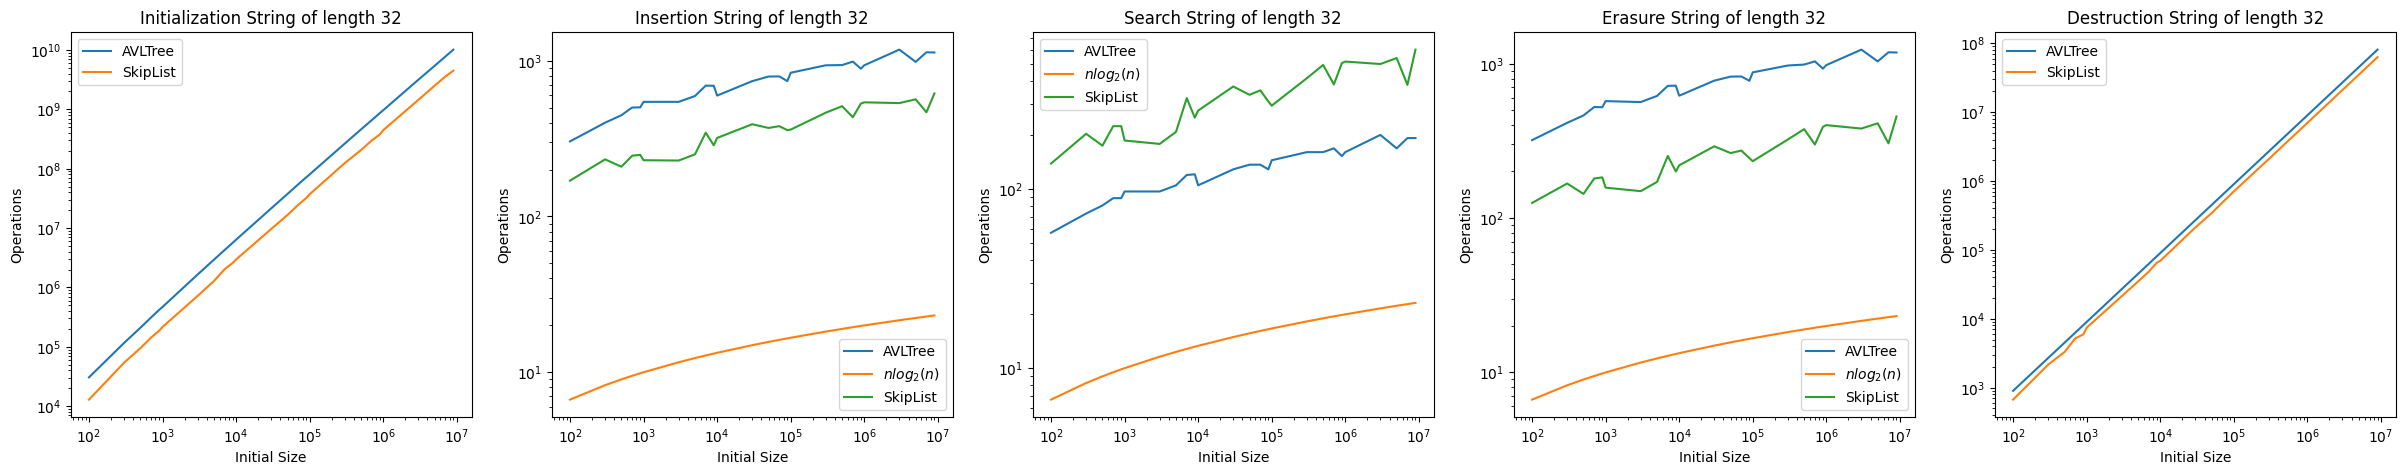

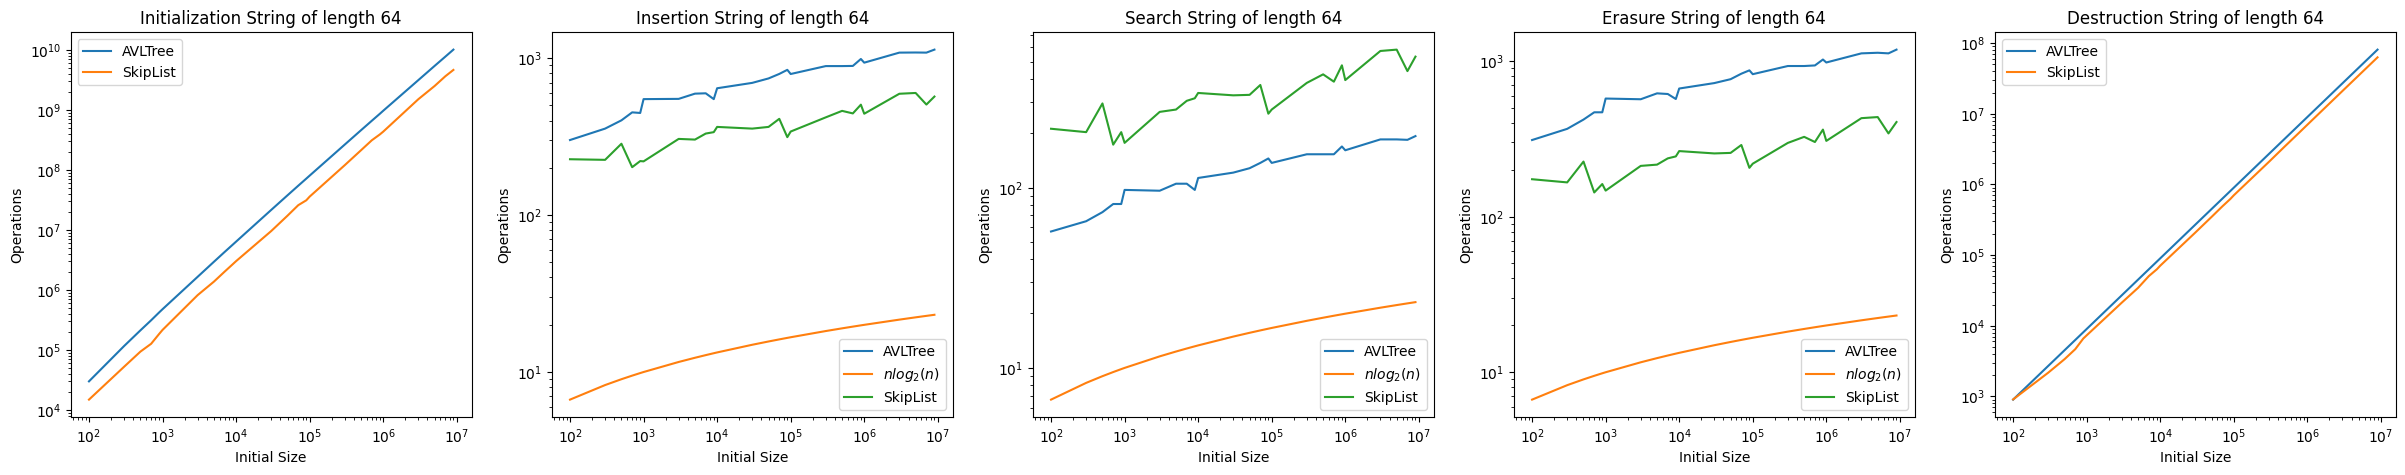

In [35]:
for datatype in sorted(avlTreeResults.keys()):
    fig, ax = plt.subplots(1, 5, figsize=(30, 5))


    for ds, dsResults in {'AVLTree' : avlTreeResults, 'SkipList' : skipListResults}.items():
        for i, operation in enumerate(('Initialization', 'Insertion', 'Search', 'Erasure', 'Destruction')):
            ax[i].set_xlabel('Initial Size')
            ax[i].set_ylabel('Operations')
            ax[i].set_title(operation + ' ' + datatype.capitalize())

            ax[i].loglog(dsResults[datatype]['InitSize'], dsResults[datatype][operation + 'Operations'], label=ds)
            if ds == 'AVLTree' and operation not in ('Initialization', 'Destruction'):
                ax[i].loglog(dsResults[datatype]['InitSize'], np.log2(dsResults[datatype]['InitSize']), label='$nlog_2(n)$')
            ax[i].legend()
plt.show()